<a href="https://colab.research.google.com/github/ORIE5355/project_competition_public/blob/main/run_gym_headtohead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1114]:
import numpy as np 
import matplotlib.pyplot as plt
import time
from IPython import display

In [1115]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1116]:
import make_env

In [1117]:
project_part = 1
agentnames = ['ThreeHonestMerchant','dummy_fixed_prices_adaptive']

In [1118]:
if project_part == 1:
    env, agents = make_env.make_env_agents(agentnames = agentnames, project_part = project_part)
    
else:
    env, agents = make_env.make_env_agents(agentnames = agentnames, project_part = project_part
    , first_file = 'data/competitionsample_3', second_file='data/competitionsample_1')

# you can replace the agentnames to match whatever agentfiles you create. 
# you can use the same agentnames for both agents

In [1119]:
T = 2500

In [1120]:
list_of_my_prices = []
list_of_valuations = []

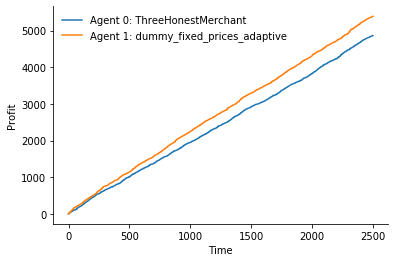

2499
customer covariate:  [8.925682293312171]
item bought: 0, agent bought from: 1, prices: [[8.479398178646562], [5.292309256440599]]
current_profit per agent:  [4861.427039883113, 5389.111893185112]

Cumulative buyer utility: 4567.806717726866


In [1121]:
env.reset()
customer_covariates, sale, profits = env.get_current_state_customer_to_send_agents()
last_customer_covariates = customer_covariates

fig, ax = plt.subplots(figsize=(20, 10))
plt.title(T)
for t in range(0, T):
    actions = [agent.action((customer_covariates, sale, profits)) for agent in agents]
    customer_covariates, sale, profits = env.step(actions)
    newplot = env.render(True)
    if newplot:
      display.clear_output(wait=True)
      display.display(plt.gcf())
    print(t)
    print('customer covariate: ', last_customer_covariates)
    list_of_my_prices.append(sale[2][0])
    list_of_valuations.append(last_customer_covariates)
    print('item bought: {}, agent bought from: {}, prices: {}'.format(sale[0],sale[1],sale[2]))
    print('current_profit per agent: ', profits,end='\n\n')
    last_customer_covariates = customer_covariates
plt.close()
print("Cumulative buyer utility: {}".format(env.cumulative_buyer_utility))

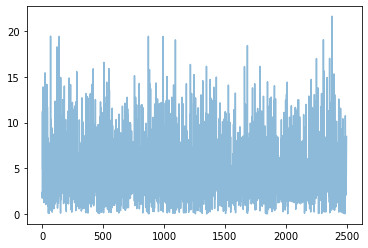

In [1122]:
plt.plot(list_of_my_prices, alpha=0.5)

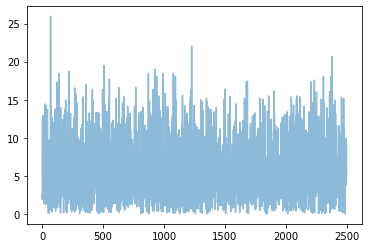

In [1123]:
plt.plot(list_of_valuations, alpha=0.5)